In [1]:
from google.colab import files
files.upload()

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d kiranmahesh/nslkdd

  0% 0.00/2.56M [00:00<?, ?B/s]
100% 2.56M/2.56M [00:00<00:00, 45.6MB/s]


In [3]:
from zipfile import ZipFile
file_name='/content/nslkdd.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [4]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [5]:
traindata = pd.read_csv('/content/kdd_train.csv')
testdata = pd.read_csv('/content/kdd_test.csv')

In [6]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
data["labels"].value_counts()

16    78588
14    47868
25     4331
7      4078
20     3302
27     3186
15     1699
1      1183
32      997
31      996
4       464
11      310
33      299
19      236
0       228
21      211
29       99
10       94
24       93
2        47
28       43
5        41
8        20
12       16
23       14
9        13
6        13
3        10
22        9
26        8
18        5
17        4
34        4
36        3
30        2
13        2
35        1
Name: labels, dtype: int64

In [ ]:
categ = ['protocol_type','service','flag','labels']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
#data[categ] = testdata[categ].apply(le.fit_transform)

In [ ]:
X = data.iloc[:,1:41]
Y = data['labels']

In [ ]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
cnn = Sequential()
cnn.add(Convolution1D(128, 3 ,activation="relu",input_shape=(40, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(40, activation="softmax"))


In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [ ]:
checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

In [ ]:

history=cnn.fit(X_train, Y_train, epochs=75,verbose=1,batch_size=500,validation_data=(X_test, Y_test),callbacks=[checkpointer])

Epoch 1/75
238/238 [==============================] - 12s 46ms/step - loss: 0.8107 - accuracy: 0.8337 - val_loss: 0.4434 - val_accuracy: 0.8794
Epoch 2/75
238/238 [==============================] - 12s 51ms/step - loss: 0.4494 - accuracy: 0.8847 - val_loss: 0.3639 - val_accuracy: 0.8994
Epoch 3/75
238/238 [==============================] - 12s 50ms/step - loss: 0.3757 - accuracy: 0.8981 - val_loss: 0.3034 - val_accuracy: 0.9072
Epoch 4/75
238/238 [==============================] - 12s 50ms/step - loss: 0.3270 - accuracy: 0.9103 - val_loss: 0.2643 - val_accuracy: 0.9277
Epoch 5/75
238/238 [==============================] - 14s 59ms/step - loss: 0.2898 - accuracy: 0.9214 - val_loss: 0.2352 - val_accuracy: 0.9301
Epoch 6/75
238/238 [==============================] - 13s 54ms/step - loss: 0.2608 - accuracy: 0.9273 - val_loss: 0.2127 - val_accuracy: 0.9353
Epoch 7/75
238/238 [==============================] - 14s 60ms/step - loss: 0.2404 - accuracy: 0.9323 - val_loss: 0.1917 - val_accuracy:

238/238 [==============================] - 15s 61ms/step - loss: 0.1129 - accuracy: 0.9688 - val_loss: 0.0878 - val_accuracy: 0.9774
Epoch 34/75
238/238 [==============================] - 13s 56ms/step - loss: 0.1133 - accuracy: 0.9685 - val_loss: 0.0878 - val_accuracy: 0.9759
Epoch 35/75
238/238 [==============================] - 11s 47ms/step - loss: 0.1107 - accuracy: 0.9694 - val_loss: 0.0857 - val_accuracy: 0.9766
Epoch 36/75
238/238 [==============================] - 12s 49ms/step - loss: 0.1104 - accuracy: 0.9692 - val_loss: 0.0877 - val_accuracy: 0.9758
Epoch 37/75
238/238 [==============================] - 10s 44ms/step - loss: 0.1095 - accuracy: 0.9694 - val_loss: 0.0847 - val_accuracy: 0.9773
Epoch 38/75
238/238 [==============================] - 11s 47ms/step - loss: 0.1081 - accuracy: 0.9701 - val_loss: 0.0824 - val_accuracy: 0.9775
Epoch 39/75
238/238 [==============================] - 12s 50ms/step - loss: 0.1090 - accuracy: 0.9697 - val_loss: 0.0826 - val_accuracy: 0.97

Epoch 70/75
238/238 [==============================] - 11s 47ms/step - loss: 0.0840 - accuracy: 0.9761 - val_loss: 0.0631 - val_accuracy: 0.9842
Epoch 71/75
238/238 [==============================] - 11s 47ms/step - loss: 0.0845 - accuracy: 0.9766 - val_loss: 0.0622 - val_accuracy: 0.9826
Epoch 72/75
238/238 [==============================] - 12s 52ms/step - loss: 0.0838 - accuracy: 0.9763 - val_loss: 0.0621 - val_accuracy: 0.9824
Epoch 73/75
238/238 [==============================] - 12s 49ms/step - loss: 0.0806 - accuracy: 0.9772 - val_loss: 0.0609 - val_accuracy: 0.9838
Epoch 74/75
238/238 [==============================] - 12s 51ms/step - loss: 0.0808 - accuracy: 0.9775 - val_loss: 0.0614 - val_accuracy: 0.9828
Epoch 75/75
238/238 [==============================] - 13s 53ms/step - loss: 0.0807 - accuracy: 0.9778 - val_loss: 0.0601 - val_accuracy: 0.9830


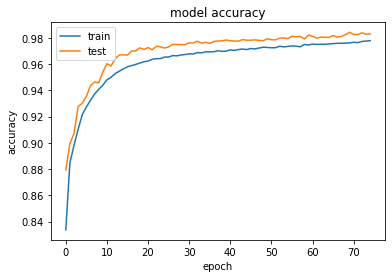

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

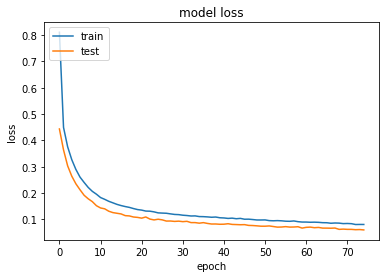

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cnn.save("results/cnn1results/cnn_model.hdf5")